# GHZ State

[Back](https://mark1626.github.io/knowledge/)

$$ \vert GHZ\rangle = \frac{(\vert 000\rangle + \vert 111\rangle)}{\sqrt2}$$

GHZ state is a type of entangled quantum state that involves atleast three subsystems.


In [1]:
import numpy as np
from qiskit import QuantumCircuit
circuit = QuantumCircuit(3)

In [2]:
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(0, 2)

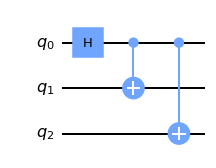

In [3]:
circuit.draw("mpl")

In [4]:
# Simulating an ideal circuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex

state = Statevector.from_int(0, 2**3)
state = state.evolve(circuit)

array_to_latex(state)


<IPython.core.display.Latex object>

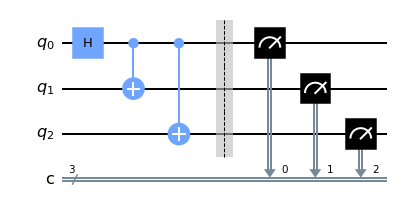

In [8]:
measurement = QuantumCircuit(3, 3)
measurement.barrier(range(3))

# map quantum bits to classical bits
measurement.measure(range(3), range(3))
quantum_circuit = measurement.compose(circuit, range(3), front=True)

quantum_circuit.draw('mpl')

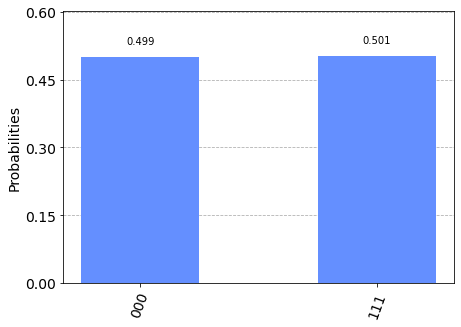

In [9]:
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
from qiskit.visualization import plot_histogram

backend = QasmSimulator()
quantum_circuit_compiled = transpile(quantum_circuit, backend)

job = backend.run(quantum_circuit_compiled, shots=1024)

result = job.result()
counts = result.get_counts(quantum_circuit_compiled)

plot_histogram(counts)

## References

- [GHZ State](https://en.wikipedia.org/wiki/Greenberger%E2%80%93Horne%E2%80%93Zeilinger_state)
- [Qiskit Circuit Basics](https://qiskit.org/documentation/tutorials/circuits/01_circuit_basics.html)